In [42]:
import pandas as pd
import numpy  as np
from scipy.stats import pearsonr
from matplotlib import pyplot as plt

In [4]:
df_airlines=pd.read_csv('Airlines_data/airlines.csv')
df_airlines.head(2)

,airline_id,airline_name
0,AA,American Airlines Inc.
1,DL,Delta Air Lines Inc.


In [5]:
df_airports=pd.read_csv('Airlines_data/airports.csv', encoding = "ISO-8859-1")
df_airports.head(2)

,airport_id,airport_name,city,state,latitude,longitude
0,ABE,Lehigh Valley International Airport,Allentown,PA,40.65236,-75.4404
1,ABI,Abilene Regional Airport,Abilene,TX,32.41132,-99.6819


In [6]:
df_events_US=pd.read_csv('Airlines_data/events_US.csv', encoding = "ISO-8859-1")
df_events_US.head(2)

,date,city,state,event_name
0,2/1/17,St. Louis,MO,NHL Winter Classic
1,4/1/17,New York,NY,National Board of Review of Motion Pictures Aw...


In [7]:
df_fares=pd.read_csv('Airlines_data/fares.csv')
df_fares.head(2)

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,...,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
0,1,AA,CLT,SGF,708,2,6,11,15,32,...,0,0,0,0,0,0,0,0,0,0
1,1,DL,DTW,SAN,1956,13,4,3,2,8,...,0,0,5,0,0,0,0,0,0,28


In [8]:
df_flight_traffic=pd.read_csv('Airlines_data/flight_traffic.csv')
df_flight_traffic.head(2)

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,...,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
0,2017,1,31,AA,CLT,PHX,1619,1615.0,18.0,1633.0,...,0,0,277.0,261.0,1773,NaN,NaN,NaN,NaN,NaN
1,2017,1,12,AA,FLL,CLT,1305,1256.0,24.0,1320.0,...,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN


In [9]:
df_weather=pd.read_csv('Airlines_data/weather.csv')
df_weather.head(2)

,airport_id,airport_name,latitude,longitude,elevation,datetime,temperature,visibility,wind_direction,wind_speed,snow_depth,cloud_status
0,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T00:54:00,3.9,16093,220,7.2,NaN,NaN
1,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T06:54:00,0.6,16093,260,6.2,NaN,NaN


In [10]:
df_stock_prices=pd.read_csv('Airlines_data/stock_prices.csv')
df_stock_prices.head(2)

,timestamp,AA,UA,B6,OO,AS,NK,WN,DL,HA
0,4/6/18,51.12,69.6501,20.12,55.70,61.44,37.8576,55.865,53.67,40.2
1,4/5/18,52.14,70.6900,20.64,56.05,62.11,38.3000,56.860,54.21,41.2


In [16]:
df_stock_prices.describe()

,AA,UA,B6,OO,AS,NK,WN,DL,HA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,47.863211,68.253974,20.788039,41.095000,79.822684,46.577652,55.283460,50.130434,45.161553
std,4.335259,6.954955,1.499153,8.663919,11.084383,8.080543,6.138288,4.104723,6.790032
min,37.380000,52.820000,16.930000,27.700000,57.750000,32.090000,38.400000,38.940000,32.850000
25%,45.242500,63.350000,19.780000,35.368750,69.735000,39.217500,52.662500,47.810000,38.987500
50%,47.695000,68.480000,20.845000,36.850000,80.495000,47.280000,55.960000,50.130000,45.975000
75%,51.030000,73.607500,22.050000,49.337500,89.185000,53.555000,59.172500,52.920000,50.362500
max,58.470000,82.030000,23.750000,60.300000,100.240000,59.740000,66.290000,60.130000,60.300000


In [24]:
df_stock_prices['day']=pd.to_datetime(df_stock_prices['timestamp']).dt.day
df_stock_prices['month']=pd.to_datetime(df_stock_prices['timestamp']).dt.month
df_stock_prices['year']=pd.to_datetime(df_stock_prices['timestamp']).dt.year

In [26]:
df_stock_prices.head()

,timestamp,AA,UA,B6,OO,AS,NK,WN,DL,HA,day,month,year
0,4/6/18,51.12,69.6501,20.12,55.70,61.44,37.8576,55.865,53.67,40.20,6,4,2018
1,4/5/18,52.14,70.6900,20.64,56.05,62.11,38.3000,56.860,54.21,41.20,5,4,2018
2,4/4/18,52.04,69.9900,20.48,55.45,61.22,37.7000,56.360,53.86,40.50,4,4,2018
3,4/3/18,51.47,69.1900,20.15,54.80,60.11,37.2200,55.970,53.72,38.75,3,4,2018
4,4/2/18,49.78,66.7700,19.73,52.75,57.75,36.3500,54.340,51.95,36.85,2,4,2018


In [28]:
df_stock_prices[['day','month','year']].head()

,day,month,year
0,6,4,2018
1,5,4,2018
2,4,4,2018
3,3,4,2018
4,2,4,2018


In [29]:
df_stock_prices_casc=df_stock_prices[['day','month','year']]
df_stock_prices_casc.loc[:,'airline_id'] = 'AA'
df_stock_prices_casc.loc[:,'stock_price'] = df_stock_prices['AA']
df_stock_prices_long=df_stock_prices_casc

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [30]:
for col in ['UA','B6','OO','AS','NK','WN','DL','HA']:
    df_stock_prices_casc=df_stock_prices[['day','month','year']]
    df_stock_prices_casc.loc[:,'airline_id'] = col
    df_stock_prices_casc.loc[:,'stock_price'] = df_stock_prices[col]
    
    df_stock_prices_long=df_stock_prices_long.append(df_stock_prices_casc)

In [32]:
df_stock_prices_long=df_stock_prices_long.reset_index()
df_stock_prices_long=df_stock_prices_long.drop(columns=['index'])

In [34]:
df_stock_prices_long.head()

,level_0,day,month,year,airline_id,stock_price
0,0,6,4,2018,AA,51.12
1,1,5,4,2018,AA,52.14
2,2,4,4,2018,AA,52.04
3,3,3,4,2018,AA,51.47
4,4,2,4,2018,AA,49.78


In [35]:
airline_traffic_stock=pd.merge(df_flight_traffic, df_stock_prices_long, on=['day','month','year','airline_id'])

In [36]:
airline_traffic_stock[:1].T

,0
year,2017
month,1
day,31
airline_id,AA
origin_airport,CLT
destination_airport,PHX
scheduled_departure,1619
actual_departure,1615
taxi_out,18
wheels_off,1633


In [37]:
airline_traffic_stock['departure_delay'] = airline_traffic_stock['actual_departure'] - \
    airline_traffic_stock['scheduled_departure']

In [38]:
airline_traffic_stock['arrival_delay'] = airline_traffic_stock['actual_arrival'] - \
    airline_traffic_stock['scheduled_arrival']

In [39]:
airline_traffic_stock['elapsed_delay'] = airline_traffic_stock['actual_elapsed'] - \
    airline_traffic_stock['scheduled_elapsed']

Airline: AA


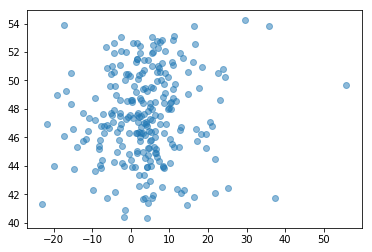

Pearsons correlation: 0.102
Airline: UA


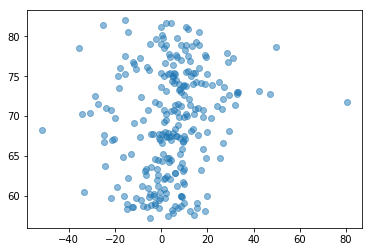

Pearsons correlation: 0.165
Airline: B6


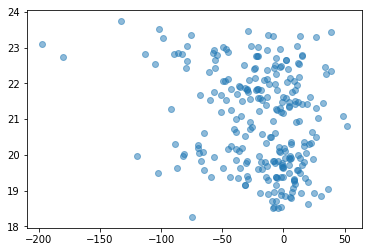

Pearsons correlation: -0.238
Airline: OO


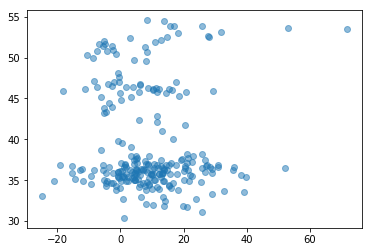

Pearsons correlation: -0.015
Airline: AS


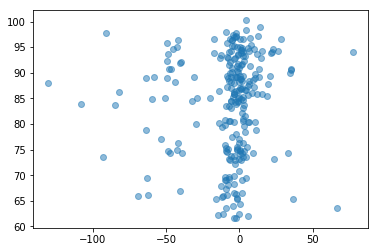

Pearsons correlation: 0.057
Airline: NK


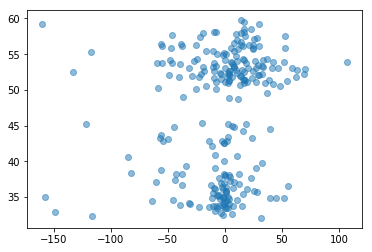

Pearsons correlation: 0.158
Airline: WN


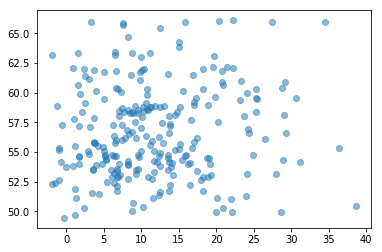

Pearsons correlation: 0.092
Airline: DL


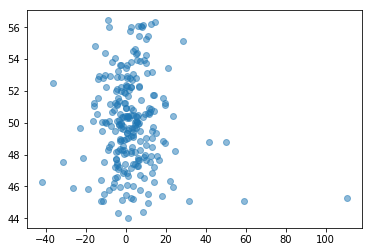

Pearsons correlation: -0.063
Airline: HA


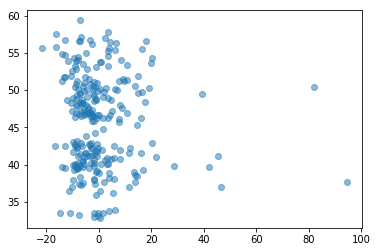

Pearsons correlation: -0.073


In [43]:
for col in ['AA', 'UA', 'B6', 'OO', 'AS', 'NK', 'WN', 'DL', 'HA']:
    print('Airline:', col)
    airline_traffic_stock_temp = airline_traffic_stock.loc[airline_traffic_stock.airline_id == col]
    airline_traffic_stock_temp = airline_traffic_stock_temp.groupby(
        ['year', 'month', 'day']).agg({'departure_delay': 'mean', 'stock_price': 'mean'})
    airline_traffic_stock_temp = airline_traffic_stock_temp.reset_index()
    plt.scatter(airline_traffic_stock_temp['departure_delay'],
                airline_traffic_stock_temp['stock_price'], alpha=0.5)
    plt.show()
    corr, _ = pearsonr(
        airline_traffic_stock_temp['departure_delay'], airline_traffic_stock_temp['stock_price'])
    print('Pearsons correlation: %.3f' % corr)

Airline: AA


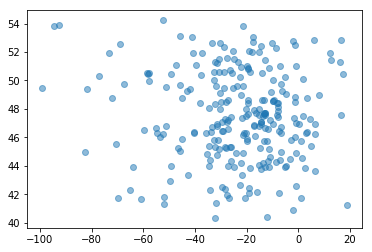

Pearsons correlation: -0.067
Airline: UA


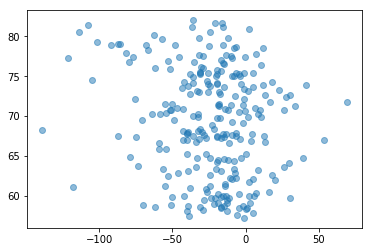

Pearsons correlation: -0.168
Airline: B6


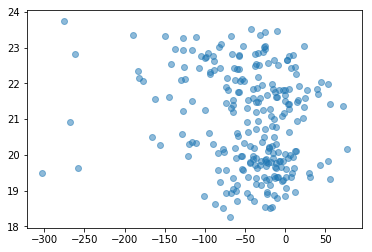

Pearsons correlation: -0.199
Airline: OO


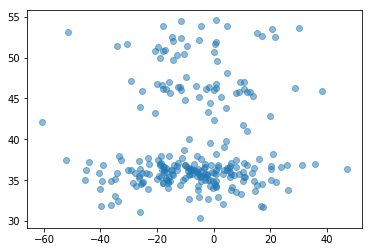

Pearsons correlation: 0.063
Airline: AS


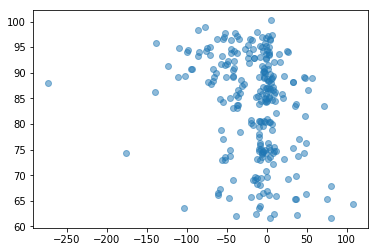

Pearsons correlation: -0.265
Airline: NK


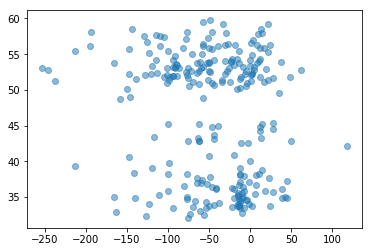

Pearsons correlation: -0.153
Airline: WN


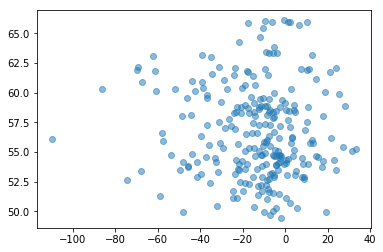

Pearsons correlation: -0.047
Airline: DL


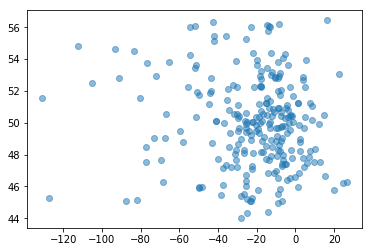

Pearsons correlation: -0.101
Airline: HA


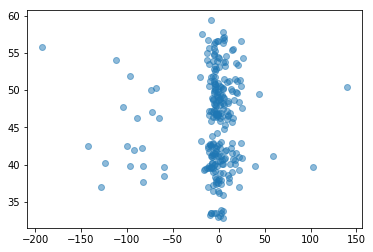

Pearsons correlation: 0.035


In [44]:
for col in ['AA', 'UA', 'B6', 'OO', 'AS', 'NK', 'WN', 'DL', 'HA']:
    print('Airline:', col)
    airline_traffic_stock_temp = airline_traffic_stock.loc[airline_traffic_stock.airline_id == col]
    airline_traffic_stock_temp = airline_traffic_stock_temp.groupby(
        ['year', 'month', 'day']).agg({'arrival_delay': 'mean', 'stock_price': 'mean'})
    airline_traffic_stock_temp = airline_traffic_stock_temp.reset_index()
    plt.scatter(airline_traffic_stock_temp['arrival_delay'],
                airline_traffic_stock_temp['stock_price'], alpha=0.5)
    plt.show()
    corr, _ = pearsonr(
        airline_traffic_stock_temp['arrival_delay'], airline_traffic_stock_temp['stock_price'])
    print('Pearsons correlation: %.3f' % corr)

Airline: AA


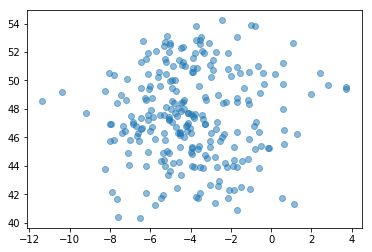

Pearsons correlation: 0.036
Airline: UA


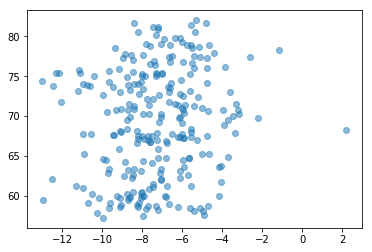

Pearsons correlation: 0.127
Airline: B6


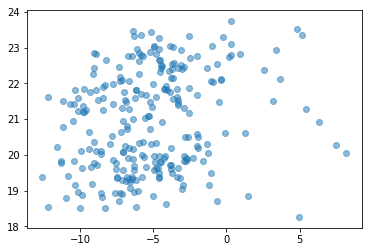

Pearsons correlation: 0.218
Airline: OO


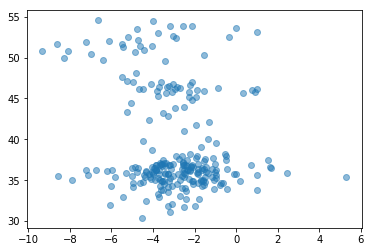

Pearsons correlation: -0.208
Airline: AS


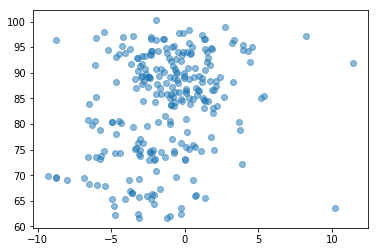

Pearsons correlation: 0.261
Airline: NK


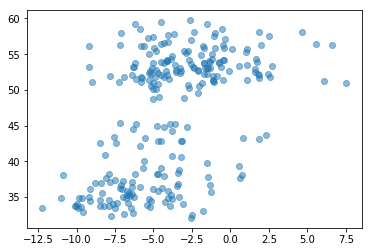

Pearsons correlation: 0.504
Airline: WN


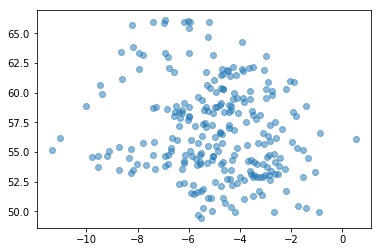

Pearsons correlation: -0.166
Airline: DL


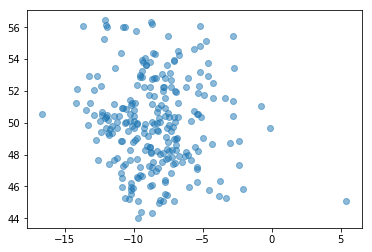

Pearsons correlation: -0.087
Airline: HA


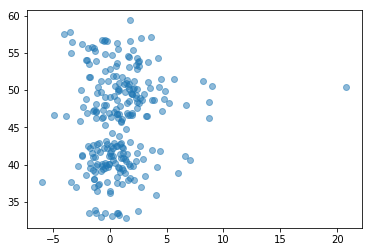

Pearsons correlation: 0.113


In [45]:
for col in ['AA', 'UA', 'B6', 'OO', 'AS', 'NK', 'WN', 'DL', 'HA']:
    print('Airline:', col)
    airline_traffic_stock_temp = airline_traffic_stock.loc[airline_traffic_stock.airline_id == col]
    airline_traffic_stock_temp = airline_traffic_stock_temp.groupby(
        ['year', 'month', 'day']).agg({'elapsed_delay': 'mean', 'stock_price': 'mean'})
    airline_traffic_stock_temp = airline_traffic_stock_temp.reset_index()
    plt.scatter(airline_traffic_stock_temp['elapsed_delay'],
                airline_traffic_stock_temp['stock_price'], alpha=0.5)
    plt.show()
    corr, _ = pearsonr(
        airline_traffic_stock_temp['elapsed_delay'], airline_traffic_stock_temp['stock_price'])
    print('Pearsons correlation: %.3f' % corr)

Airline: AA


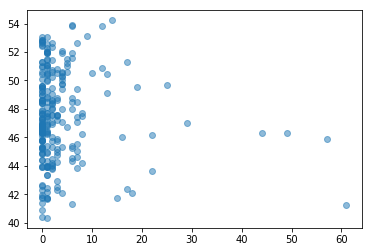

Pearsons correlation: -0.066
Airline: UA


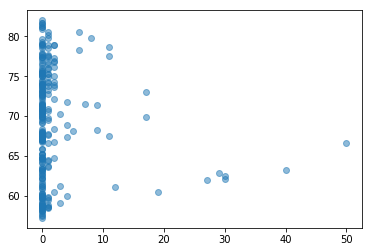

Pearsons correlation: -0.086
Airline: B6


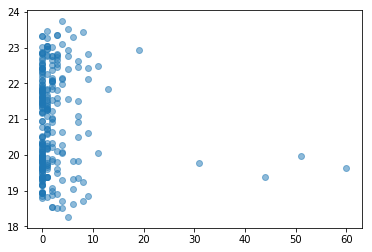

Pearsons correlation: -0.057
Airline: OO


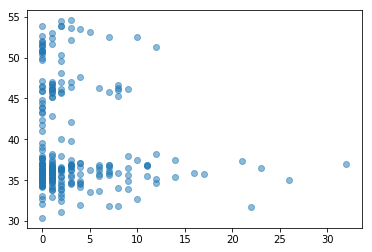

Pearsons correlation: -0.109
Airline: AS


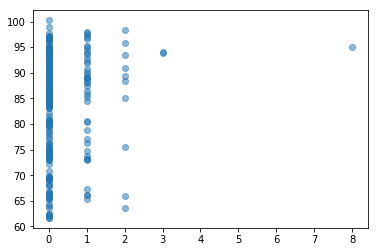

Pearsons correlation: 0.123
Airline: NK


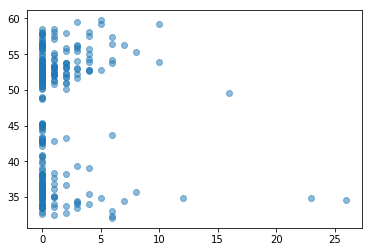

Pearsons correlation: -0.013
Airline: WN


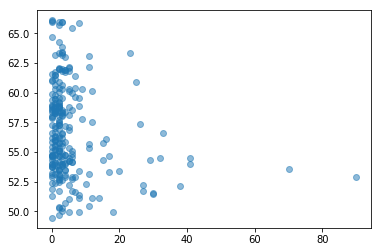

Pearsons correlation: -0.188
Airline: DL


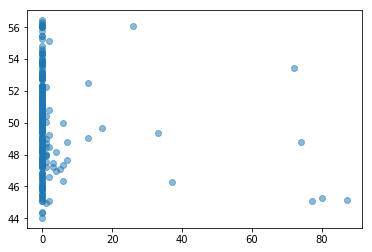

Pearsons correlation: -0.139
Airline: HA


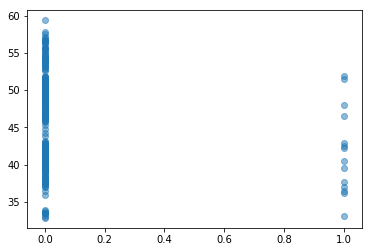

Pearsons correlation: -0.148


In [46]:
for col in ['AA', 'UA', 'B6', 'OO', 'AS', 'NK', 'WN', 'DL', 'HA']:
    print('Airline:', col)
    airline_traffic_stock_temp = airline_traffic_stock.loc[airline_traffic_stock.airline_id == col]
    airline_traffic_stock_temp = airline_traffic_stock_temp.groupby(
        ['year', 'month', 'day']).agg({'cancelled': 'sum', 'stock_price': 'mean'})
    airline_traffic_stock_temp = airline_traffic_stock_temp.reset_index()
    plt.scatter(airline_traffic_stock_temp['cancelled'],
                airline_traffic_stock_temp['stock_price'], alpha=0.5)
    plt.show()
    corr, _ = pearsonr(
        airline_traffic_stock_temp['cancelled'], airline_traffic_stock_temp['stock_price'])
    print('Pearsons correlation: %.3f' % corr)

Airline: AA


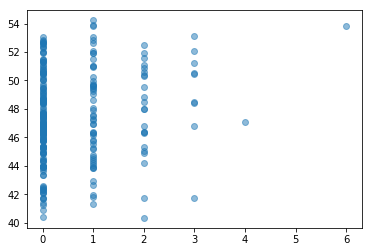

Pearsons correlation: 0.155
Airline: UA


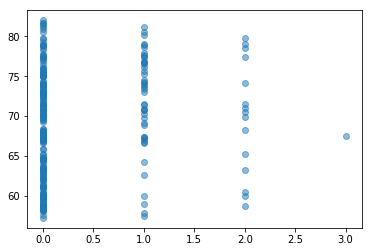

Pearsons correlation: 0.137
Airline: B6


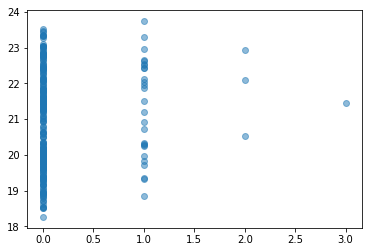

Pearsons correlation: 0.120
Airline: OO


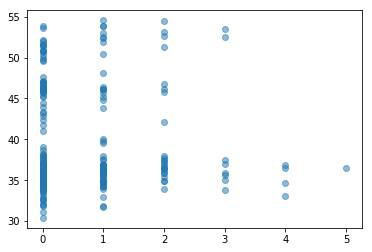

Pearsons correlation: 0.017
Airline: AS


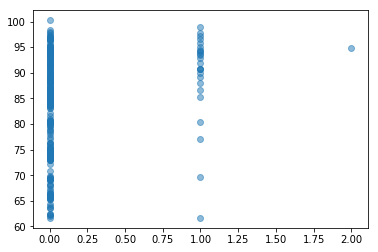

Pearsons correlation: 0.204
Airline: NK


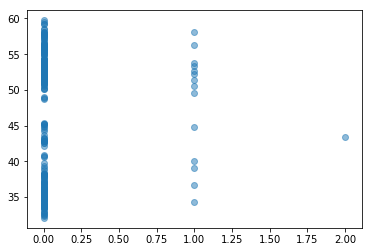

Pearsons correlation: 0.024
Airline: WN


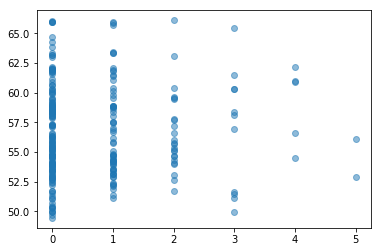

Pearsons correlation: 0.030
Airline: DL


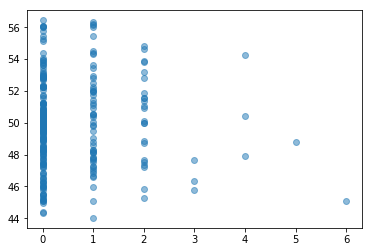

Pearsons correlation: -0.026
Airline: HA


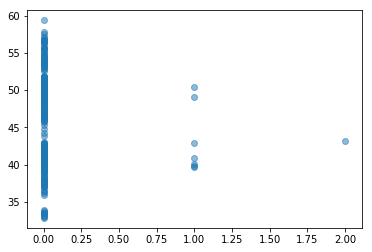

Pearsons correlation: -0.068


In [47]:
for col in ['AA', 'UA', 'B6', 'OO', 'AS', 'NK', 'WN', 'DL', 'HA']:
    print('Airline:', col)
    airline_traffic_stock_temp = airline_traffic_stock.loc[airline_traffic_stock.airline_id == col]
    airline_traffic_stock_temp = airline_traffic_stock_temp.groupby(
        ['year', 'month', 'day']).agg({'diverted': 'sum', 'stock_price': 'mean'})
    airline_traffic_stock_temp = airline_traffic_stock_temp.reset_index()
    plt.scatter(airline_traffic_stock_temp['diverted'],
                airline_traffic_stock_temp['stock_price'], alpha=0.5)
    plt.show()
    corr, _ = pearsonr(
        airline_traffic_stock_temp['diverted'], airline_traffic_stock_temp['stock_price'])
    print('Pearsons correlation: %.3f' % corr)

So we can see that there is almost **no correlation** among departure_delay, arrival_delay, elapsed delay, cancelled and diverted flights with stock price.